# Italian data exploration

## Data importation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regressions as reg
import numpy as np
sns.set_theme(style='white')
energy_table = pd.read_csv('../BDD/energy.csv', sep=';')
energy_table = energy_table[energy_table['Code']=='ITA']
gdp_table = pd.read_csv('../BDD/gdp-per-capita-maddison-2020.csv', sep=',')
gdp_table = gdp_table[gdp_table.Code=='ITA']

gdp_table.drop('Entity', axis=1, inplace=True)
gdp_table.drop('Code', axis=1, inplace=True)
gdp_table.drop('145446-annotations', axis=1, inplace=True)
pop_table = pd.read_csv('../BDD/population.csv', sep=';')
pop_table = pop_table[pop_table.Code=='ITA']
ITA_table = pd.merge(gdp_table, pop_table, on=['Year'])
ITA_table = pd.merge(ITA_table, energy_table, on=['Year'])
ITA_table.head()

,Year,GDP per capita,Entity_x,Code_x,"Total population (Gapminder, HYDE & UN)",Entity_y,Code_y,Primary energy consumption (TWh)
0,1862,2634.35,Italy,ITA,26471122,Italy,ITA,127.008962
1,1863,2688.11,Italy,ITA,26642796,Italy,ITA,127.008962
2,1864,2642.03,Italy,ITA,26812516,Italy,ITA,126.067507
3,1865,2780.28,Italy,ITA,26980520,Italy,ITA,124.922276
4,1866,2588.27,Italy,ITA,27150708,Italy,ITA,123.777045


In [2]:
pop = ITA_table['Total population (Gapminder, HYDE & UN)']
gdp = ITA_table['GDP per capita']*pop
energy = ITA_table['Primary energy consumption (TWh)']*3.6
year = ITA_table['Year']
yplot = np.linspace(year.min(), year.max(), 200)


## Energy

No handles with labels found to put in legend.


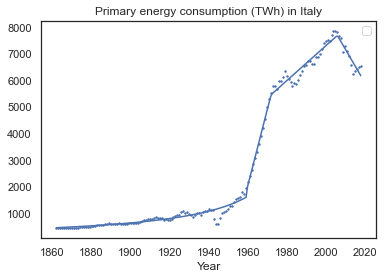

In [3]:
plt.scatter(year, energy, s=2) 
plt.xlabel('Year')
plt.title('Primary energy consumption (TWh) in Italy')

b,c,d,f,h,k,x1,x2, x3, x4 = 2000, 1964, 250, 95, 0.001, -100, 1961, 1973, 1998, 2008
b,c,d,f,h,k,x1,x2, x3, x4 =reg.hypLLLL(year, energy/36, p0=(b,c,d,f,h,k,x1,x2, x3, x4), bounds = [-200,3000])

plt.plot(yplot, 36*reg.hypllll(yplot,b,c,d,f,h,k,x1,x2, x3, x4 ))

plt.legend()

ITA_table['Energy(PJ)-Time(Year)'] = 36*reg.hypllll(year,b,c,d,f,h,k,x1,x2, x3, x4 )

## GDP

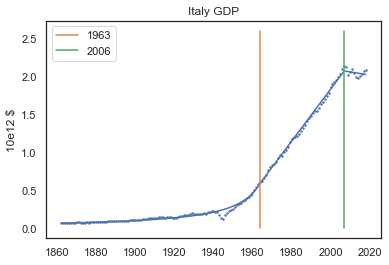

In [4]:
plt.scatter(year, gdp/10**12, s=2)
plt.title('Italy GDP')
b,c,d,f,x1,x2 = 12, 1983,0.033,0.025,1971,2009
# plt.plot(yplot, reg.hyp_lin_lin(yplot,b,c,d,f,x1,x2 ))
b,c,d,f,x1,x2 = reg.hypLinLin (year, gdp/10**12, p0=(b,c,d,f,x1,x2), bounds = [-2, 2100])
plt.plot(yplot, reg.hyp_lin_lin(yplot,b,c,d,f,x1,x2 ))
plt.plot([x1, x1], [0, 2.6], label=str(int(x1)))
plt.plot([x2, x2], [0, 2.6], label=str(int(x2)))
plt.legend()
plt.ylabel('10e12 $')
ypred= (10**12)*reg.hyp_lin_lin(year,b,c,d,f,x1,x2 )
ITA_table['GDP(2011$)-Time(year)']=ypred

### Correlation

(0.188378735512, 0.009556078762800001, 9.999725341796875, -0.016587533188330852, 0.02784617924368879, 0.022219443006100823)
No handles with labels found to put in legend.


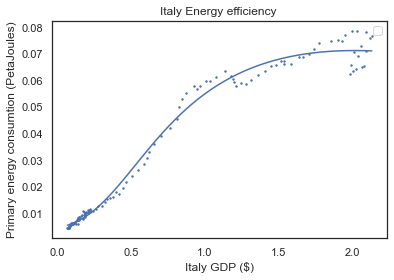

In [5]:
g= gdp/10**12
e = energy/10**5
gplot = np.linspace(g.min(), g.max(), 200)
plt.scatter(g,e, s= 2)
plt.xlabel('Italy GDP ($)')
plt.ylabel('Primary energy consumtion (PetaJoules)')
plt.title('Italy Energy efficiency ')
G_i, E_i, A, a1, a2, a3 = reg.sReg(g,e, bounds= [-5, 1000])
plt.plot(gplot, reg.s_model(gplot,G_i, E_i, A, a1, a2, a3 ))
inf_dist = np.array([abs(g[i]-0.3) for i in range(len(g))])
year_infl = year[inf_dist.argmin()]


e_max = reg.s_model(gplot,G_i, E_i, A, a1, a2, a3 ).argmax()
max_dist = np.array([abs(g[i]-gplot[e_max]) for i in range(len(g))])
year_max = year[max_dist.argmin()] 
plt.legend()
ypred = reg.s_model(g,G_i, E_i, A, a1, a2, a3)*(10**5)
ITA_table['Energy(PJ)-GDP(10e12$)'] = ypred

No handles with labels found to put in legend.


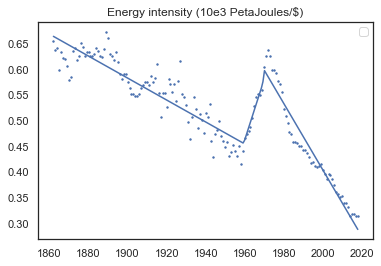

In [6]:
plt.scatter(year, energy/gdp*10**8, s=2)
a,b, c, e, g, x1, x2, x3 = -10, 10, 10, -3*10, -1.5*10, 1959, 1970, 1983
a,b, c, e, g, x1, x2, x3 = reg.LLLL(year, energy/gdp*10**8, p0=(a,b, c, e, g, x1, x2, x3) , bounds = [-200,2010])
plt.plot(yplot, reg.llll(yplot,a,b, c, e, g, x1, x2, x3 ))

plt.legend()
plt.title('Energy intensity (10e3 PetaJoules/$)')
ypred= (10**8)*3.6*reg.llll(year,a,b, c, e, g, x1, x2, x3 )
ITA_table['EI(PJ/$)-Time(year)']=ypred


,Year,GDP per capita,Entity_x,Code_x,"Total population (Gapminder, HYDE & UN)",Entity_y,Code_y,Primary energy consumption (TWh),Energy(PJ)-Time(Year),GDP(2011$)-Time(year),Energy(PJ)-GDP(10e12$),EI(PJ/$)-Time(year)
0,1862,2634.35,Italy,ITA,26471122,Italy,ITA,127.008962,469.264380,6.914892e+10,564.480914,2.391118e+08
1,1863,2688.11,Italy,ITA,26642796,Italy,ITA,127.008962,472.711256,6.975394e+10,567.706121,2.383423e+08
2,1864,2642.03,Italy,ITA,26812516,Italy,ITA,126.067507,476.209143,7.036965e+10,566.366231,2.375729e+08
3,1865,2780.28,Italy,ITA,26980520,Italy,ITA,124.922276,479.759182,7.099632e+10,573.645456,2.368034e+08
4,1866,2588.27,Italy,ITA,27150708,Italy,ITA,123.777045,483.362549,7.163426e+10,565.398389,2.360340e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
152,2014,32829.00,Italy,ITA,60410000,Italy,ITA,1730.776000,6679.390516,2.042169e+12,7119.211719,1.130223e+08
153,2015,33118.00,Italy,ITA,60578000,Italy,ITA,1769.081000,6553.406342,2.037942e+12,7120.243359,1.106932e+08
154,2016,33419.00,Italy,ITA,60663000,Italy,ITA,1786.273000,6427.422168,2.033714e+12,7120.257175,1.083641e+08
155,2017,34027.34,Italy,ITA,60674000,Italy,ITA,1803.876000,6301.437994,2.029486e+12,7118.174211,1.060350e+08


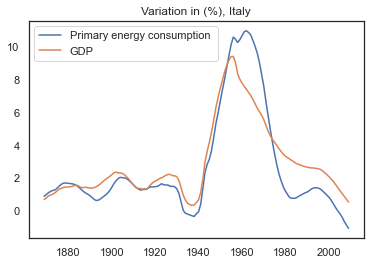

In [7]:
from derivee import growth_rate
x, y=growth_rate(year, energy, s=10, a =15 )
x1,y1 = growth_rate(year, gdp, s=10, a=15)
plt.plot(x,y, label = "Primary energy consumption ")
plt.plot(x1, y1, label = "GDP" )
plt.legend()
plt.title("Variation in (%), Italy")
ITA_table

In [10]:
ITA_table= ITA_table.rename(columns={'Code_x':'Code', 'Entity_x':'Entity','Energy (PetaJoules)':'Primary energy (PJ)', 'Primary energy consumption (TWh)':'Primary energy (TWh)','Total population (Gapminder, HYDE & UN)': 'Population'})
ITA_table['Primary energy (PJ)']=energy
ITA_table.to_csv('../BDD/final_tables/ITA.csv', index=False)

In [11]:
ITA_table.head()

,Year,GDP per capita,Entity,Code,Population,Entity_y,Code_y,Primary energy (TWh),Energy(PJ)-Time(Year),GDP(2011$)-Time(year),Energy(PJ)-GDP(10e12$),EI(PJ/$)-Time(year),Primary energy (PJ)
0,1862,2634.35,Italy,ITA,26471122,Italy,ITA,127.008962,469.264380,6.914892e+10,564.480914,2.391118e+08,457.232263
1,1863,2688.11,Italy,ITA,26642796,Italy,ITA,127.008962,472.711256,6.975394e+10,567.706121,2.383423e+08,457.232263
2,1864,2642.03,Italy,ITA,26812516,Italy,ITA,126.067507,476.209143,7.036965e+10,566.366231,2.375729e+08,453.843024
3,1865,2780.28,Italy,ITA,26980520,Italy,ITA,124.922276,479.759182,7.099632e+10,573.645456,2.368034e+08,449.720193
4,1866,2588.27,Italy,ITA,27150708,Italy,ITA,123.777045,483.362549,7.163426e+10,565.398389,2.360340e+08,445.597361
